<a href="https://colab.research.google.com/github/wafiesa/Flight_Analysis/blob/main/Flight_Analysis_2007.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Flight Delays And Cancellations In 2007**

**Project Overview**

This project proposes data analysis of flight data for the year 2007. This analysis encompasses critical parameters such as flight delays, cancellations and the factors influencing these events. By examining this data, we can identify trends, patterns and anomalies.

The 2007 dataset is particularly valuable as it captures a unique historical perspective. Utilizing statistical techniques and data visualization tools, this analysis aims to enhance our understanding of flight dynamics and contribute to better decision-making in the industry.

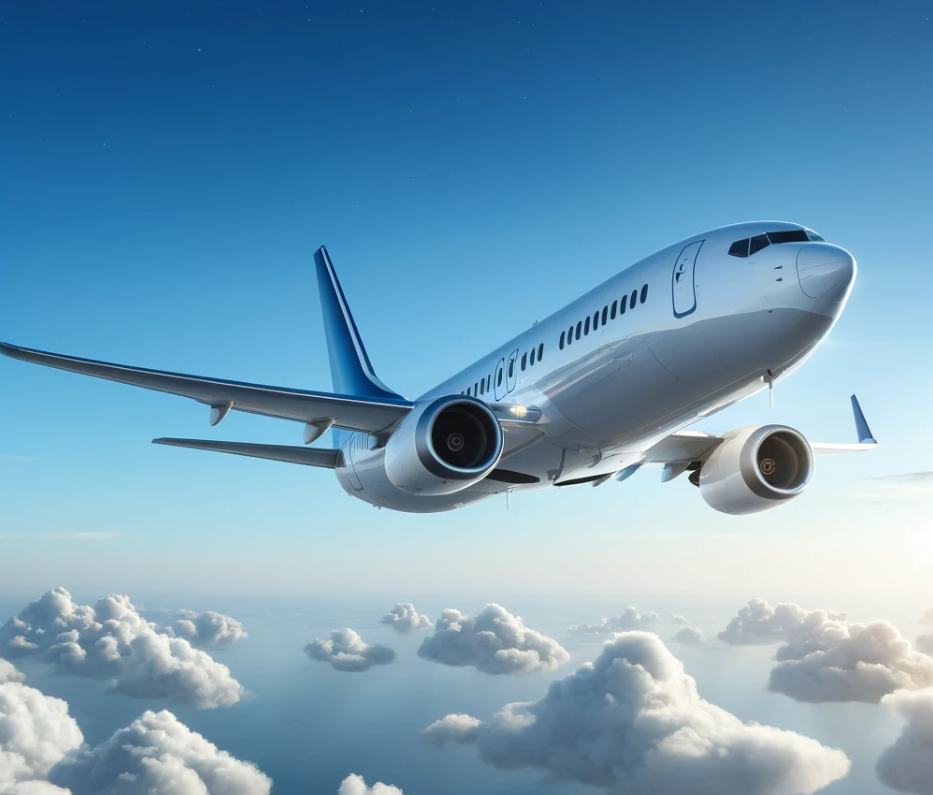

**Commercial Airlines Outlook 2007**

In 2007, commercial airlines in the USA faced numerous challenges, significantly impacting their operations and profitability. Rising fuel costs were a major concern, squeezing profit margins and leading to increased ticket prices.

Additionally, heightened security measures post-9/11 continued to affect passenger convenience and operational efficiency. The industry also grappled with fluctuating demand, partly due to economic uncertainty and competition from low-cost carriers.

Weather-related disruptions and airport congestion further contributed to delays and cancellations, straining customer satisfaction. These challenges necessitated strategic adaptations, including cost-cutting measures, improved fuel efficiency and enhanced customer service to navigate the turbulent landscape of the aviation industry.

**Code and Resources Used**
+ Hortonworks HDP Sandbox Version: 2.6.5.0
+ Putty Version: 0.81
+ Hive Version: 1.2.1000
+ Jupyter Notebook Version: 6.5.4
+ Packages: pandas, numpy, matplotlib, seaborn, plotly express, dataframe_image
+ Dataset Source: (Kaggle) https://tinyurl.com/u8rzvdsx

**Dataset Information**
+ '2007.csv' contains flight data from Kaggle.
+ 'airports.csv' contains details such latitude and longitude information for airports.
+ 'carriers.csv' contains description for commercial airlines operators.
+ 'plane-data.csv' contains information of type of planes used by airliners and the manufacturers.

---

**Flight Data 2007 Table**

| **Attribute**        | **Type** | **Attribute**           | **Type** |
|----------------------|----------|-------------------------|----------|
| **year**             | string   | **crselapsedtime**: Estimated Elapsed time, in minutes | int      |
| **month**: 1-12      | string   | **actualelapsedtime**: Actual Elapsed time, in minutes   | int      |
| **dayofmonth**: 1-31 | string   | **origin**: Origin IATA airport code                    | string   |
| **dayofweek**: 1 (Monday) - 7 (Sunday) | string   | **dest**: Destination IATA airport code              | string   |
| **crsdeptime**: scheduled departure time (local, hhmm) | string   | **distance**: Distance between airports in miles   | int      |
| **deptime**: actual departure time (local, hhmm) | string   | **taxiin**: Wheels down and arrival at the destination airport gate, in minutes | int      |
| **crsarrtime**: scheduled arrival time (local, hhmm) | string   | **taxiout**: The time elapsed between departure from the origin airport gate and wheels off, in minutes | int      |
| **arrtime**: actual arrivaltime (local, hhmm) | string   | **cancelled**: was the flight cancelled?            | bool     |
| **uniquecarrier**: Carrier Code | string   | **cancellationcode**: reason for cancellation (A = carrier, B = weather, C = NAS, D = security) | string   |
| **flightnum**: Flight Number | string   | **diverted**: 1 = yes, 0 = no                       | bool     |
| **tailnum**: Plane Tail Number | string   | **carrierdelay**: Delay (in minutes) caused by Carrier | int      |
| **airtime**: flight time in minutes | int      | **weatherdelay**: Delay caused by weather, in minutes | int      |
| **arrdelay**: difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers, in minutes | int      | **nasdelay**: National Air System Delay, in minutes | int      |
| **depdelay**: Difference in minutes between scheduled and actual departure time. Early departures show negative numbers, in minutes | int      | **securitydelay**: Security Delay, in Minutes | int      |
|                      |          | **lateaircraftdelay**: Late Aircraft Delay, in Minutes | int      |

---

**Airport Attributes Table**

| **Attribute**          | **Type** | **Attribute**           | **Type** |
|------------------------|----------|-------------------------|----------|
| **airport**: Airport Name  | string   | **lat**: Airport Latitude  | string   |
| **city**: Airport City     | string   | **long**: Airport Longitude | string   |
| **country**: Airport Country | string   | **state**: Airport State  | string   |
| **iata**: Airport Code     | string   |                         |          |

---

**Carrier Attributes Table**

| **Attribute**          | **Type** | **Attribute**            | **Type** |
|------------------------|----------|--------------------------|----------|
| **code**: Carrier Code | string   | **description**: Carrier name | string   |

---

**Plane Attributes Table**

| **Attribute**              | **Type** | **Attribute**             | **Type** |
|----------------------------|----------|---------------------------|----------|
| **tailnum**: Aircraft Tail Number   | string   | **status**: Status                | string   |
| **type**: Usage Type                 | string   | **aircraft_type**: Aircraft Type  | string   |
| **manufacturer**: Manufacturer Company | string   | **engine_type**: Engine Type      | string   |
| **issue_date**: Date Start Operating  | string   | **year**: Manufacture Year        | int      |
| **model**: Aircraft Model             | string   |                                   |          |

---

**Data Import To Hadoop File And Hive Database**

The 2007.csv contains huge dataset that consumed approximately over 686.5MB. Thus exceeding the maximum file handling for Putty and Hortonworks Sandbox HDP 2.6.5.0.

However, we can use Command Prompt to upload the 2007.csv into Putty by using SCP client for command line secure file copy pscp.exe which is downloadable from https://www.chiark.greenend.org.uk/~sgtatham/putty/latest.html.

The dataset can be downloaded by putting together the command below:

---
**Command Prompt**

```
Microsoft Windows [Version 10.0.22631.3593]
(c) Microsoft Corporation. All rights reserved.

C:\Users\Name>cd C:\ProgramData\Microsoft\Windows\Start Menu\Programs\PuTTY (64-bit)

C:\ProgramData\Microsoft\Windows\Start Menu\Programs\PuTTY (64-bit)>pscp -P 2222 "C:\Users\Name\Desktop\Data Management\2007.csv" maria_dev@127.0.0.1:2007.csv
```
---

---
**PuTTY Commands**

```
hadoop fs -mkdir flight_data_2007
hadoop fs -put 2007.csv flight_data_2007
```
---

Similarly we can repeat the steps above to load datasets for airports.csv, carriers.csv and plane-data.csv into Hadoop. Now, that the dataset is loaded in HDP, we can import the datasets into Hive Database using Query Editor as below:


![LocateDirectory](https://drive.google.com/uc?export=view&id=1-POyFl0fvMM1ozXbLP48uZz46IG17pRh)

**Image 1: Screenshoot to locate Hadoop file directory.**

Once the HDP is ready, we can locate the file directory from the File Preview. This directory will be use to upload into Hive Database as shown in the figure below:


![HiveDatabase](https://drive.google.com/uc?export=view&id=1-KSNbdfQ88xfKTC-iQET9CGDWdxjO9N6)
**Image 2: Screenshot of upload table in Hive HDP.**

Similarly we can repeat the steps above to load datasets into Hive Database for airports.csv, carriers.csv and plane-data.csv. Now, that the dataset is loaded in Hive, we can overview and explore the datasets using Query Editor.

First, we combine the datasets by identifying the most relevant variables. This will give more insights of the data.

We can join the selected variables using the command below:

![JoinTables](https://drive.google.com/uc?export=view&id=1-SyieMk0X1ZtvJMC1rgTT7-uGAN8u_Ak)

**Image 3: Query to join all four tables for better insights.**

**1. Optimal Times In Day, Week And Year For Minimizing Flight Delays**

The query above will generate huge dataset exceeding 1.3GB and data this big will not ideal for local data processing. Thus we will carefully select the suitable variables that could contribute to flight delays and cancellations.

Now, we will execute query as below:

![DayofMonth](https://drive.google.com/uc?export=view&id=1-C2vwmYG3gMc7B4zRWGUhrONEpBqOK9h)

**Image 4: Query to extract delays in days of month.**

![DayofWeek](https://drive.google.com/uc?export=view&id=1-PK6UTammAql_SrD62ijFNHoODv7CZxo)

**Image 5: Query for to extract delays during the weeks.**

![Month](https://drive.google.com/uc?export=view&id=1-5TfSow0q1hfc0DCpRX6ffidvIL3xYTE)

**Image 6: Query to extract delays over the months.**

![PrimaryFactorsDelays](https://drive.google.com/uc?export=view&id=1lZe6_sutUtiKUCXol_IdHaeHlqSiSdnL)


**Image 7: Query to extract primary factors for flight delays and cancellations.**

![FactorsCancellations](https://drive.google.com/uc?export=view&id=1hAKbB0dYrAQFLJZSz0DTfgqrSJgNjGZb)

**Image 8: Query to extract factors for flight cancellations.**

![MostDelays&Cancelled](https://drive.google.com/uc?export=view&id=1-VR-Jh-R6jDuwu9c_Ds5ZkGj8O5KQ0Ck)

**Image 9: Query to extract most frequent delays and flight cancellations.**

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [16]:
day_of_month = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Flight_Analysis/Query1-DayofMonth.csv")
day_of_week = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Flight_Analysis/Query1-DayofWeek.csv")
month_year = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Flight_Analysis/Query1-Month.csv")
primary_delays = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Flight_Analysis/Query2-PrimaryFactorsContributingDelays.csv")
factor_cancelled = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Flight_Analysis/Query3-FactorsforCancellations.csv")
most_delays = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Flight_Analysis/Query4-FlightsWithMostDelays&Cancellations.csv")

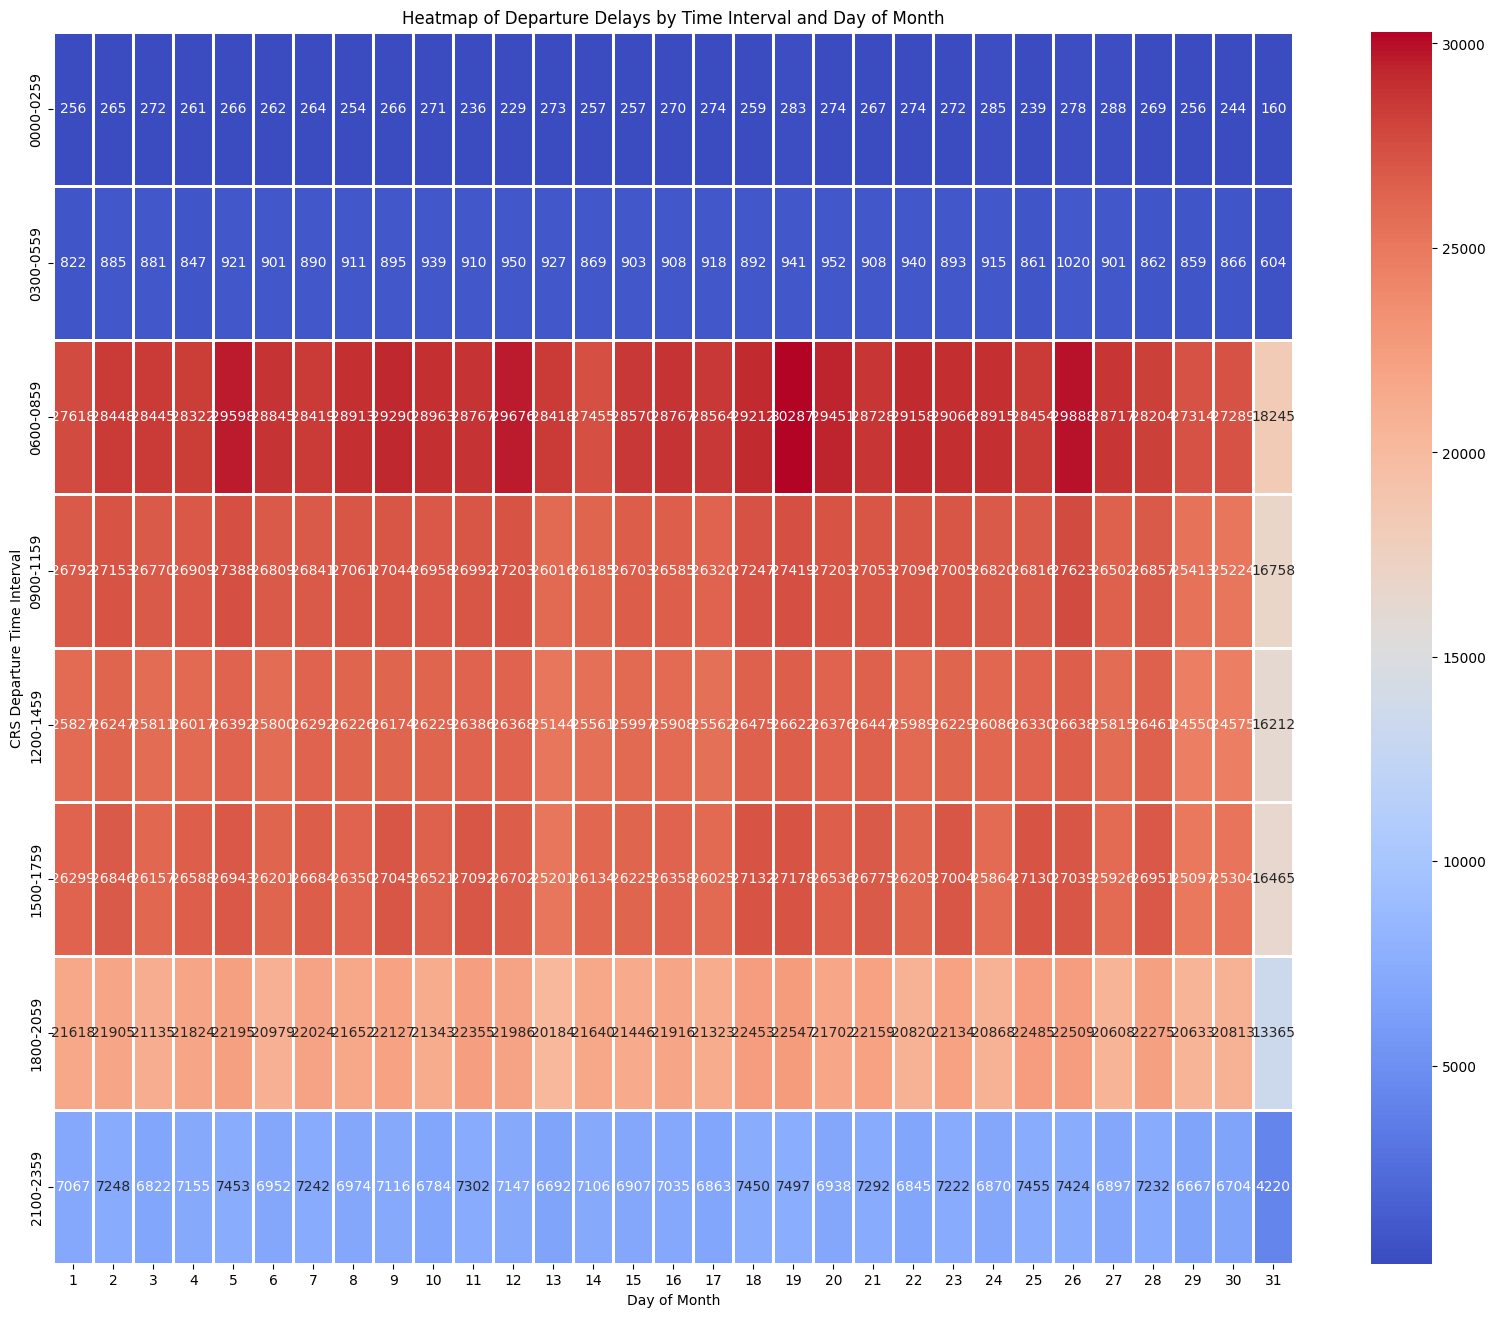

In [9]:
heatmap_data = day_of_month.pivot_table(
    index='crsdeptime_interval',
    columns='dayofmonth',
    values='count_depdelay_status',
    aggfunc='count'
)

f, ax = plt.subplots(figsize=(20, 16))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='coolwarm', linewidths=.75, ax=ax)
plt.title('Heatmap of Departure Delays by Time Interval and Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('CRS Departure Time Interval')
plt.show()

🔶 Insights: From the figure above, we can observe that the least delayed flights during the day were in the time intervals of 0000-0259 hour and 0300-0559 hour. This early morning flights have the lowest delays.

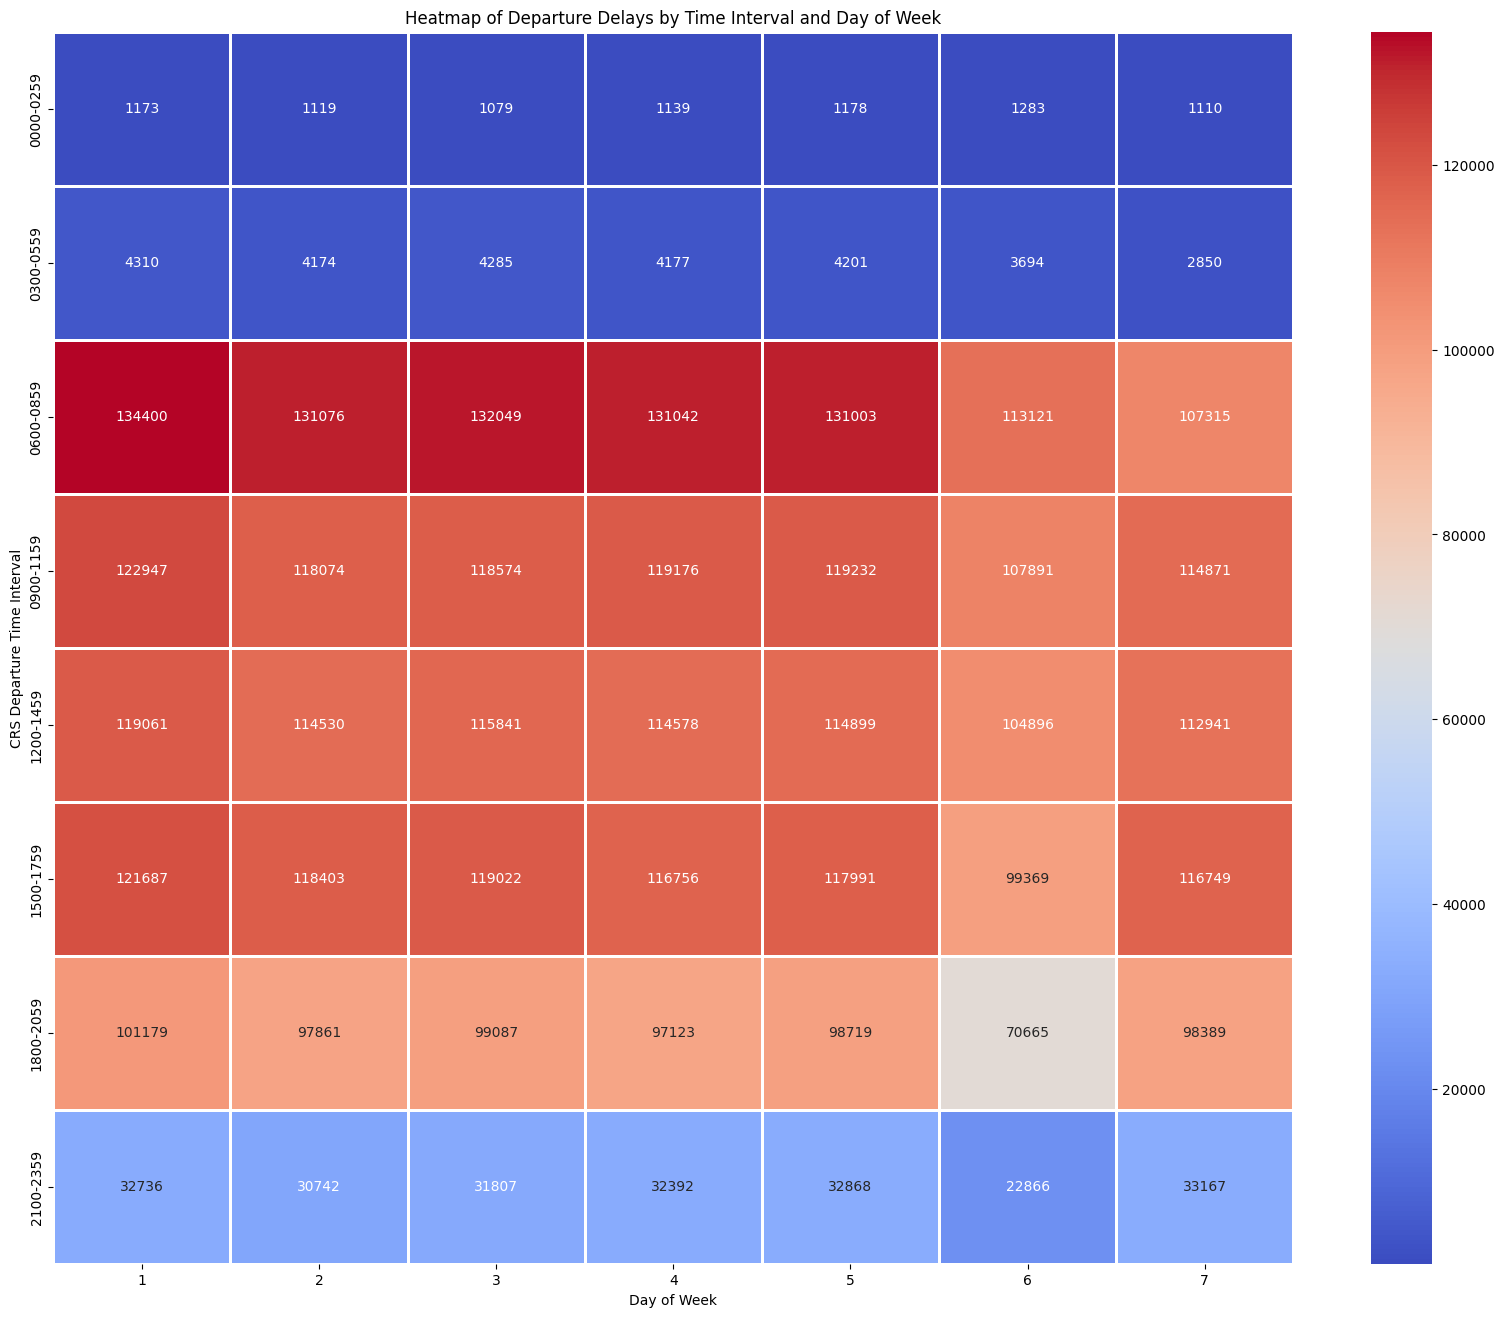

In [10]:
heatmap_data = day_of_week.pivot_table(
    index='crsdeptime_interval',
    columns='dayofweek',
    values='count_depdelay_status',
    aggfunc='count'
)

f, ax = plt.subplots(figsize=(20, 16))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='coolwarm', linewidths=.75, ax=ax)
plt.title('Heatmap of Departure Delays by Time Interval and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('CRS Departure Time Interval')
plt.show()

🔶 Insights: From the Heatmap of Departure Delays by Time Interval and Day of Week, we can observe that the least delayed flights during the week were on Wednesday in the time intervals 0000-0259.

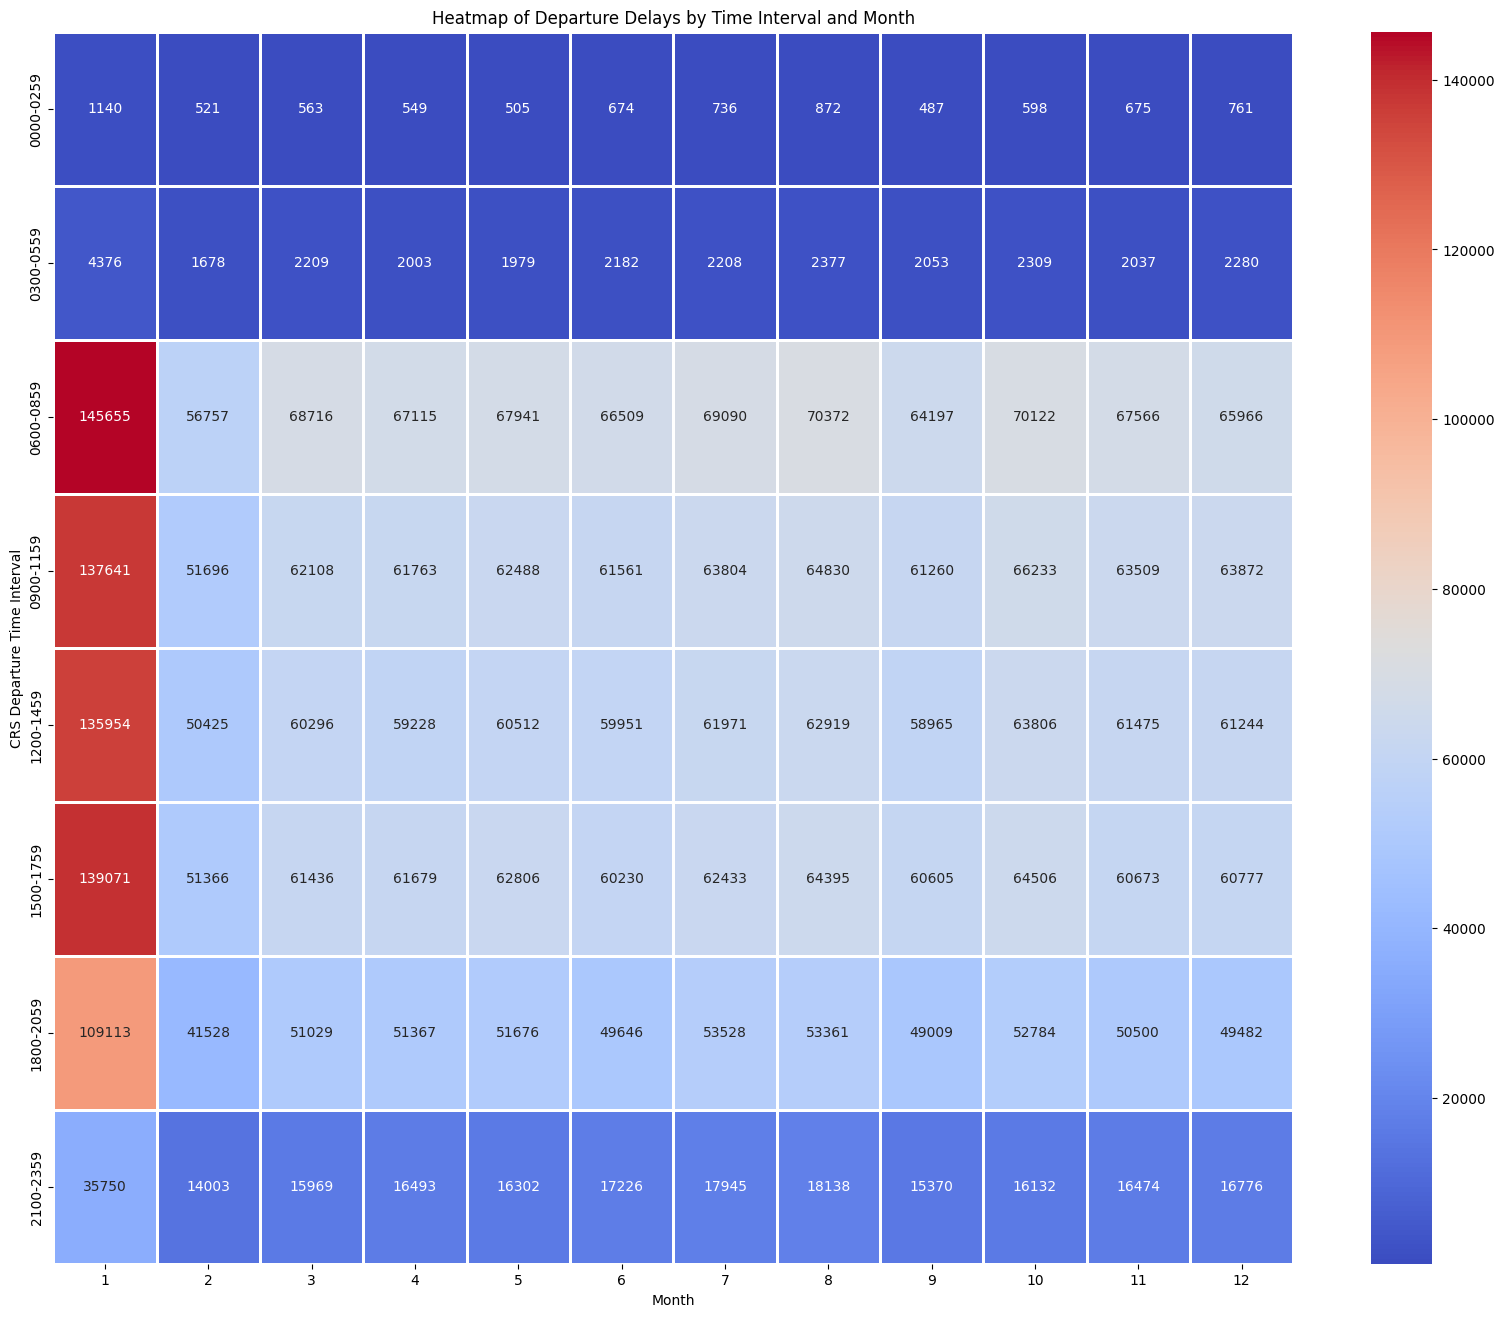

In [11]:
heatmap_data = month_year.pivot_table(
    index='crsdeptime_interval',
    columns='month',
    values='count_depdelay_status',
    aggfunc='count'
)

f, ax = plt.subplots(figsize=(20, 16))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='coolwarm', linewidths=.75, ax=ax)
plt.title('Heatmap of Departure Delays by Time Interval and Month')
plt.xlabel('Month')
plt.ylabel('CRS Departure Time Interval')
plt.show()

🔶Insights: From the Heatmap of Departure Delays by Time Interval and Month, we can observe that the least delayed flights during the year was on the month of February 2007 in the time intervals 0000-0259.

In [ ]:
import plotly.express as px

fig = px.scatter_mapbox(month_year, lat='originlat', lon='originlong', color='count_depdelay_status', hover_data= {'originairport': True, 'count_depdelay_status': True},
                        color_continuous_scale=px.colors.sequential.Viridis, mapbox_style='carto-positron', size_max=15, zoom=10)

fig.update_layout(autosize=True, mapbox_style='open-street-map', mapbox=dict(center=dict(lat=38, lon=-97), pitch=0, zoom=3))
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

**2. Primary Factors Contributing Flight Delays**

From the table below, we can observe that the most significant factor, with a total of 22,091,176 minutes of delay is the caused from Late Aircraft. Delays caused by a late incoming aircraft often cascade to affect the departure times of subsequent flights operated by the same aircraft.

Meanwhile Carrier delays, which total 16,590,482 minutes, typically include factors such as maintenance or ground problems. These are directly controlled by the air carrier.

Additionally, National Airspace System (NAS) includes delays of 16,535,622 minutes that are due to non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control.

Weather-related delays accounted for 3,408,203 minutes. These delays are due to significant meteorological conditions (such as storms or fog) that affect flight operations and safety.

Lastly, security delays are the least common cause, with 100,274 minutes of delay. This includes delays due to evacuations of terminals, re-boarding of aircraft due to security breaches, inoperative screening equipment and long lines at screening areas.

In [17]:
primary_delays

,reason,totaltime
0,Late Aircraft,22091176
1,Carrier,16590482
2,NAS,16535622
3,Weather,3408203
4,Security,100274


| Reason        | Total Time (minutes)    |
|---------------|---------------|
| Late Aircraft | 22091176      |
| Carrier       | 16590482      |
| NAS           | 16535622      |
| Weather       | 3408203       |
| Security      | 100274        |

🔶Insights: The table above shows that late aircraft delays were the highest cause of delay, totalling 22,091,176 minutes. This was followed by delays caused by the carriers, totalling 16,590,482 minutes.

**3. Factors Leading To Flight Cancellations**

In [5]:
factor_cancelled.head()

,month,flightnum,carrierdescription,destairport,originairport,diverted,weatherdelay,nasdelay,securitydelay,lateaircraftdelay,cancelled,total_cancellations
0,1,33,Alaska Airlines Inc.,Ted Stevens Anchorage International,Kodiak,0,0,0,0,0,1,13
1,1,32,Alaska Airlines Inc.,Kodiak,Ted Stevens Anchorage International,0,0,0,0,0,1,13
2,1,7098,Mesa Airlines Inc.,Denver Intl,Aspen-Pitkin Co/Sardy,0,0,0,0,0,1,11
3,1,4825,Atlantic Southeast Airlines,William B Hartsfield-Atlanta Intl,Erie Intl,0,0,0,0,0,1,10
4,1,7115,Mesa Airlines Inc.,Chicago O'Hare International,Austin Straubel International,0,0,0,0,0,1,10


🔶Upon reviewing the table above, it is apparent that the top 5 highest flight cancellations are not attributed to weather conditions, late aircraft delays, NAS delays, or flight diversions.

Another potential factor contributing to flight cancellations could be low passenger bookings, which may lead airlines to cancel flights. Additionally, technical issues with the flights, not included in the dataset, might also contribute to these cancellations.

**4. Most Frequent Delays And Cancellations**

In [6]:
most_delays.head()

,flightnumber,carrier,totaldelayminutes,totalcancellations
0,2996,Expressjet Airlines Inc.,20048.0,0
1,64,Alaska Airlines Inc.,19063.0,31
2,2393,Expressjet Airlines Inc.,18001.0,0
3,2782,Expressjet Airlines Inc.,17997.0,0
4,44,Southwest Airlines Co.,17584.0,0


🔶Insights: Based on the data provided in the table, it is evident that Expressjet Airlines flight number 2996 experienced the highest frequency of delays, accumulating a total of 20,048 minutes of delay. Following closely behind is Alaska Airlines with flight number 64, which accumulated 19,063 minutes of delay. Additionally, other flights operated by Expressjet Airlines also ranked among the top 5 most frequently delayed flights, including flight number 2393 with 18,001 minutes of delay and flight number 2782 with 17,997 minutes of delay.

In a separate analysis, it was observed that Alaska Airlines flight number 64 was cancelled 31 times over the course of the year, making it the flight with the highest number of cancellations.

**Recommendations**

**Choosing Carriers**

When selecting an airline, consider to review on-time performance, cancellation policies for each the choosen routes. Based on the analysis above, we can use the findings to choose wisely for a better journey.

**Route Selections**

Choosing the right flight route is crucial for enhancing your travel experience. Opt for ideal flights to avoid potential delays or possibly cancellations. Seasonal weather patterns should also influence your decision, as certain routes might be prone to weather-related disruptions.

**Conclusion**

When planning your travel, it's essential to compare airlines based on their service records, which include their punctuality and cancellations policy. Additionally, you might need to consider the flights frequency for the airlines as this will ensure you will get on the next flight whenever cancellations occured.

Inconclusion, research different airlines for the best service records and convenience on your chosen route.